In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/content/Online Retail.xlsx")

**Reasoning**:
Display the first few rows of the DataFrame to verify the data is loaded correctly.



In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Perform exploratory data analysis (EDA)




# Display data types

In [4]:
print("Data Types:")
df.dtypes

Data Types:


,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


# Display info

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# Check for missing values

In [6]:
print("\nMissing Values:")
df.isnull().sum()



Missing Values:


,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


# Check for duplicate rows

In [29]:
print("\nDuplicate Rows:")
df.duplicated().sum()



Duplicate Rows:


np.int64(5268)

In [30]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,Season
count,541909.0,541909,540455,541909.000000,541909,541909.000000,541909,541909,541909.000000,541909,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,4373,38,NaN,13,4
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,nan,United Kingdom,NaN,2011-11,Autumn
freq,1114.0,2313,2369,NaN,NaN,NaN,135080,495478,NaN,84711,195679
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,NaN,NaN,17.987795,NaN,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,NaN,NaN,-168469.600000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,NaN,NaN,3.400000,NaN,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,NaN,NaN,9.750000,NaN,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,NaN,NaN,17.400000,NaN,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,NaN,NaN,168469.600000,NaN,NaN


## Create 'Revenue' column

### Subtask:
Calculate the revenue for each transaction by multiplying 'Quantity' and 'UnitPrice'.


**Reasoning**:
Create the 'revenue' column by multiplying 'Quantity' and 'UnitPrice'.



In [31]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,Season
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,Winter
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Winter
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,Winter
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Winter
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,Winter


## Convert data types

### Subtask:
Convert columns to appropriate data types (e.g., convert 'InvoiceDate' to datetime objects).


**Reasoning**:
Convert the 'InvoiceDate' column to datetime objects and the 'CustomerID' column to string data type, then verify the data types.



In [32]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(str)
print(df.dtypes)

InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID              object
Country                 object
Revenue                float64
InvoiceMonth         period[M]
Season                  object
dtype: object


## Identify most buying products

### Subtask:
Determine the products with the highest total quantity sold.


**Reasoning**:
Group the DataFrame by product and calculate the sum of the quantity, then sort and display the top products by quantity.



In [33]:
product_quantities = df.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False)
display(product_quantities.head(10))

,,Quantity
StockCode,Description,
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
85099B,JUMBO BAG RED RETROSPOT,47363
84879,ASSORTED COLOUR BIRD ORNAMENT,36381
22197,POPCORN HOLDER,36334
21212,PACK OF 72 RETROSPOT CAKE CASES,36039
85123A,WHITE HANGING HEART T-LIGHT HOLDER,35025
23084,RABBIT NIGHT LIGHT,30680
22492,MINI PAINT SET VINTAGE,26437
22616,PACK OF 12 LONDON TISSUES,26315


## Analyze sales by country and date

### Subtask:
Identify the countries with the most sales and analyze sales trends over time.


**Reasoning**:
Group the data by country and count the unique invoice numbers to find the number of sales per country. Then sort and display the top 10.



Extract the date from the InvoiceDate column into a new column and group by this new column to sum the revenue for each day. Finally, sort by date and display the result.

In [34]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.month

df['Season'] = df['InvoiceMonth'].apply(
    lambda x: 'Winter' if x in [12, 1, 2]
    else 'Spring' if x in [3, 4, 5]
    else 'Summer' if x in [6, 7, 8]
    else 'Autumn'
)


## Identify most revenue generated country

### Subtask:
Determine the countries with the highest total revenue.


**Reasoning**:
Calculate the total revenue for each country by grouping the DataFrame by 'Country' and summing the 'revenue' column, then sort in descending order and display the top 10.



In [35]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
print("Top 10 countries by total Revenue:")
display(country_revenue.head(10))

Top 10 countries by total Revenue:


,Revenue
Country,
United Kingdom,8187806.364
Netherlands,284661.540
EIRE,263276.820
Germany,221698.210
France,197403.900
Australia,137077.270
Switzerland,56385.350
Spain,54774.580
Belgium,40910.960


In [36]:
seson_revenue= df.groupby('Season')['Revenue'].sum().sort_values(ascending=False)
print("Top 10 countries by total Revenue:")
display(seson_revenue)

Top 10 countries by total Revenue:


,Revenue
Season,
Autumn,3552148.542
Winter,2240687.940
Summer,2055103.741
Spring,1899807.711


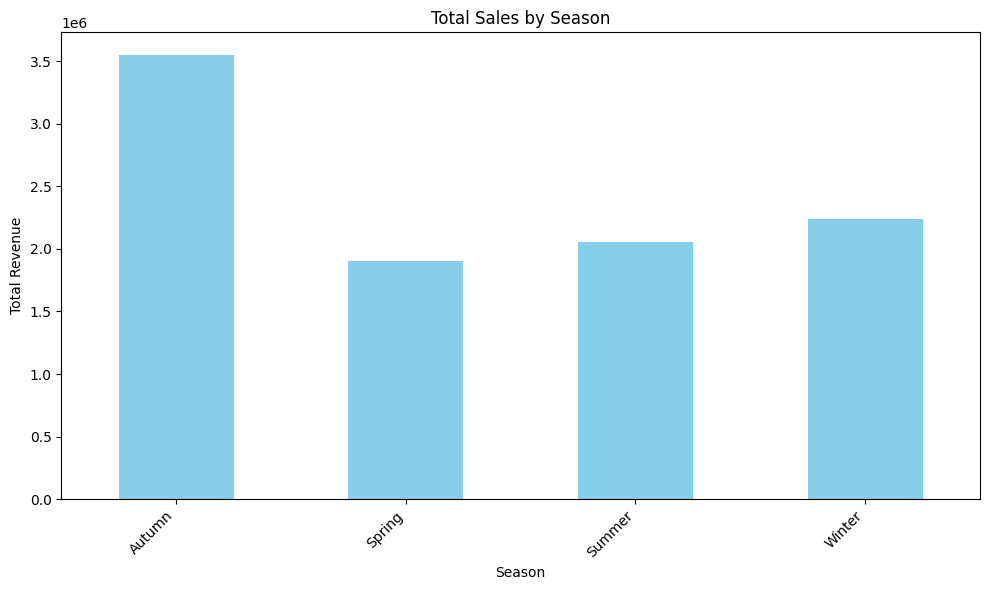

In [37]:
# prompt: generate bar graph to show total sell for all seasons

import matplotlib.pyplot as plt
# Calculate total sales per season
season_sales = df.groupby('Season')['Revenue'].sum()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
season_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Season')
plt.xlabel('Season')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Graphical Representation

## Identify most sales country

### Subtask:
Determine the countries with the highest number of sales transactions.


**Reasoning**:
Group the DataFrame by 'Country', count the unique 'InvoiceNo' for each country, sort the results in descending order, and display the top 10.



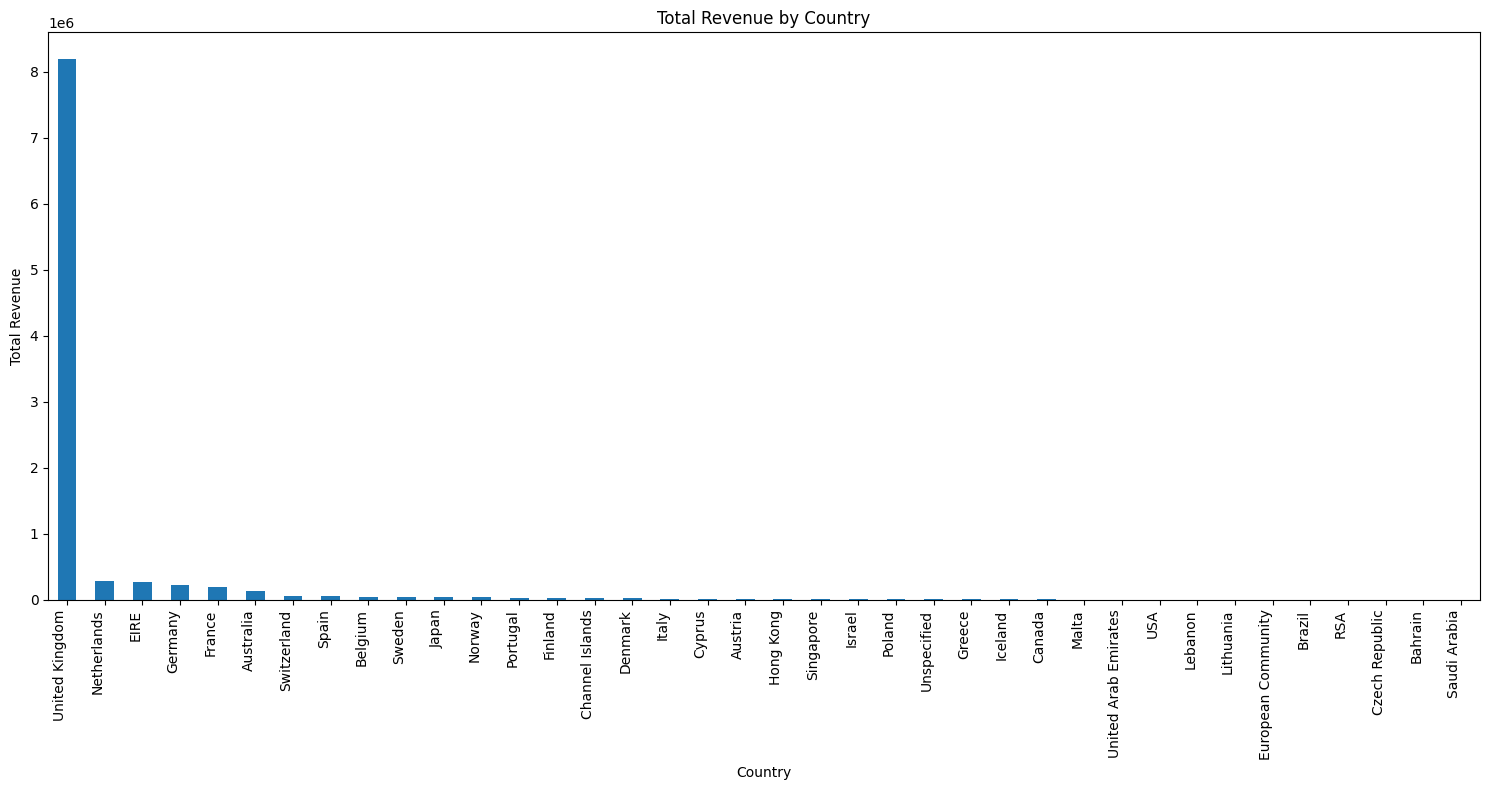

In [38]:
plt.figure(figsize=(15, 8))  # You might need a larger figure size
country_revenue.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Country')
plt.xticks(rotation=90, ha='right') # Rotate labels further if needed
plt.tight_layout()
plt.show()

Reasoning:

A line plot is chosen because it effectively visualizes trends and fluctuations in revenue over time, which is ideal for sequential date-based data like daily_revenue. It clearly shows how revenue changes from one day to the next, making patterns and seasonality visible

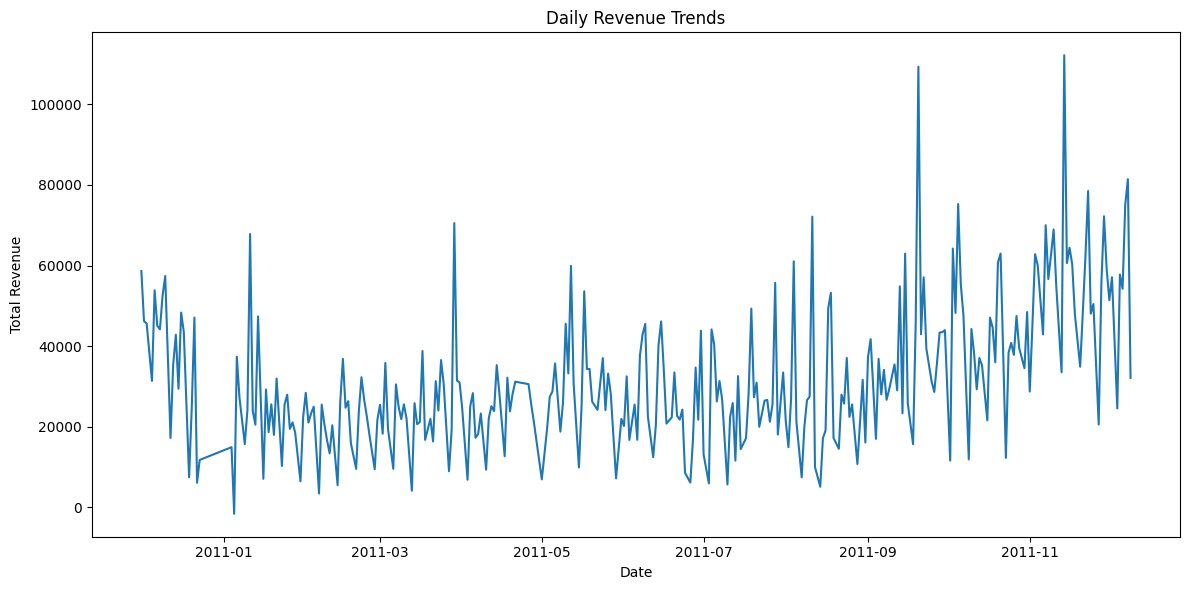

In [42]:
# Extract the date from the InvoiceDate column into a new column
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Group by this new column and sum the revenue for each day
daily_revenue = df.groupby('InvoiceDay')['Revenue'].sum().sort_index()

plt.figure(figsize=(12, 6))
daily_revenue.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Daily Revenue Trends')
plt.tight_layout()
plt.show()

## Identify repeated customers and their products

### Subtask:
Find customers who have made multiple purchases and the products they repeatedly buy.


**Reasoning**:
Filter the DataFrame to include only repeat customers and then group by customer and product to count product occurrences for each repeat customer.



In [43]:
# Filter for customers with more than one unique invoice
repeat_customers = df.groupby('CustomerID')['InvoiceNo'].nunique()
repeat_customer_ids = repeat_customers[repeat_customers > 1].index
repeat_customer_df = df[df['CustomerID'].isin(repeat_customer_ids)]

# Group by CustomerID and StockCode and count product occurrences
product_counts_per_customer = repeat_customer_df.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().reset_index()

# Identify top frequently purchased products for each repeat customer (considering positive quantities for purchases)
product_counts_per_customer = product_counts_per_customer[product_counts_per_customer['Quantity'] > 0]
top_products_per_customer = product_counts_per_customer.sort_values(by=['CustomerID', 'Quantity'], ascending=[True, False])

# Display a sample of the results
print("Sample of frequently purchased products by repeat customers:")
display(top_products_per_customer.head(20))

Sample of frequently purchased products by repeat customers:


,CustomerID,StockCode,Quantity
59,12347.0,23076,240
94,12347.0,84558A,126
36,12347.0,22492,108
60,12347.0,23084,84
16,12347.0,21731,72
24,12347.0,22196,72
87,12347.0,84991,72
88,12347.0,84992,72
17,12347.0,21791,48
19,12347.0,21975,48


In [49]:
# Extract the year from the InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year

# Identify top customers based on total quantity purchased per year
customer_quantity_yearly = df.groupby(['CustomerID', 'Year'])['Quantity'].sum()

# Filter customers who bought more than 100 products in a year (considering positive quantities)
top_buyers_yearly = customer_quantity_yearly[customer_quantity_yearly > 100].sort_values(ascending=False)

# Display all customers who bought more than 100 products in a year
print("Customers who bought more than 100 products in a year and their total quantity:")
display(top_buyers_yearly)

Customers who bought more than 100 products in a year and their total quantity:


,,Quantity
CustomerID,Year,
nan,2011,223696
14646.0,2011,190005
12415.0,2011,77242
14911.0,2011,74242
17450.0,2011,68243
...,...,...
14114.0,2011,101
17556.0,2011,101
13113.0,2010,101


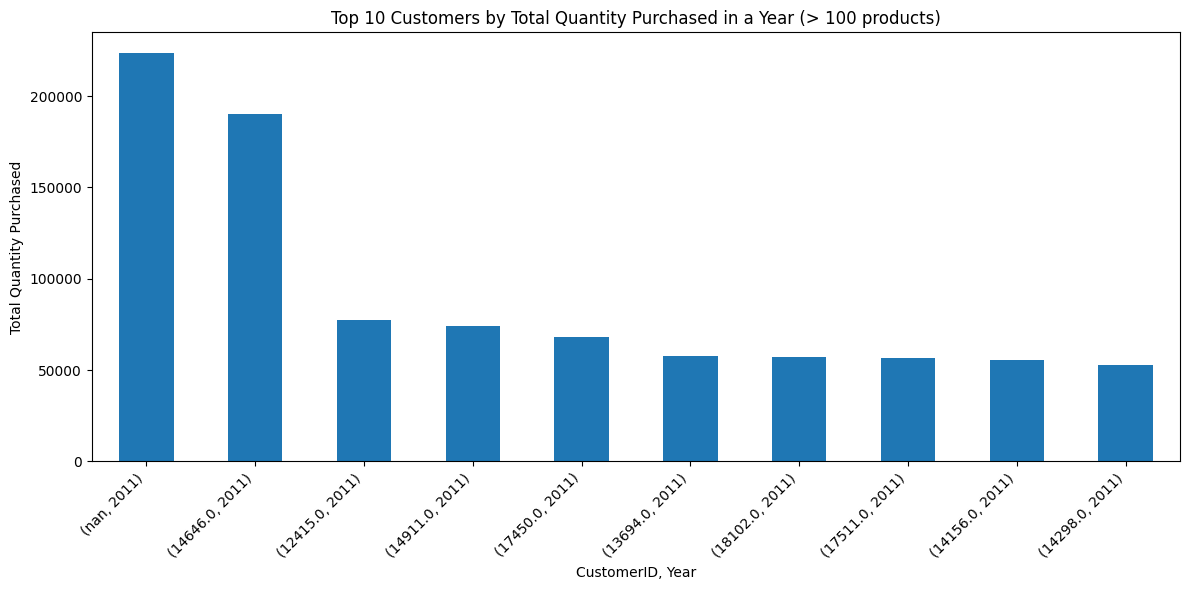

In [51]:
# Get the top 10 customers by yearly quantity purchased
top_10_yearly_buyers = top_buyers_yearly.head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
top_10_yearly_buyers.plot(kind='bar')
plt.xlabel('CustomerID, Year')
plt.ylabel('Total Quantity Purchased')
plt.title('Top 10 Customers by Total Quantity Purchased in a Year (> 100 products)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Monthly Revenue trends:


,Revenue
InvoiceMonth,
2010-12,748957.020
2011-01,560000.260
2011-02,498062.650
2011-03,683267.080
2011-04,493207.121
2011-05,723333.510
2011-06,691123.120
2011-07,681300.111
2011-08,682680.510


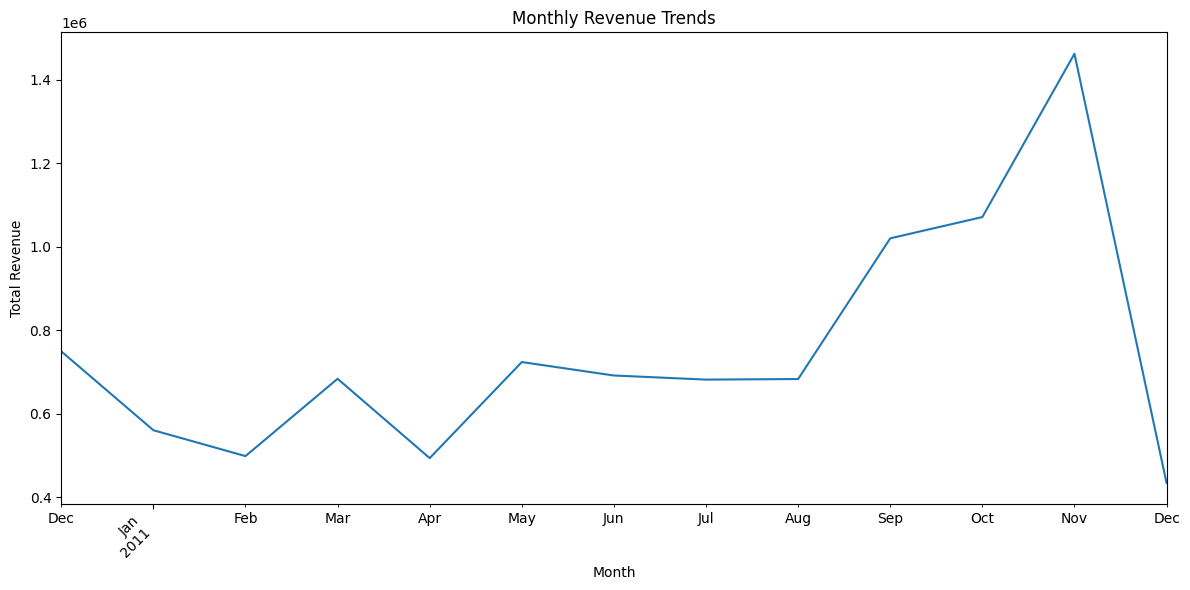

In [50]:
# Extract month and year
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by month and sum the revenue
monthly_revenue = df.groupby('InvoiceMonth')['Revenue'].sum().sort_index()

print("\nMonthly Revenue trends:")
display(monthly_revenue)

# Visualize the monthly revenue trends
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue Trends')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     541909 non-null  object        
 1   StockCode     541909 non-null  object        
 2   Description   540455 non-null  object        
 3   Quantity      541909 non-null  int64         
 4   InvoiceDate   541909 non-null  datetime64[ns]
 5   UnitPrice     541909 non-null  float64       
 6   CustomerID    541909 non-null  object        
 7   Country       541909 non-null  object        
 8   Revenue       541909 non-null  float64       
 9   InvoiceMonth  541909 non-null  period[M]     
 10  Season        541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6), period[M](1)
memory usage: 45.5+ MB


## Perform linear regression


find Corr()



In [25]:
# Step 1: Convert 'InvoiceDay' to datetime (if not already done)
# df['InvoiceDay'] = pd.to_datetime(df['InvoiceDay'], errors='coerce')

# Step 2: Extract month
df['InvoiceMonth'] = df['InvoiceDay'].dt.to_period('M')

# Step 3: Calculate Revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Step 4: Group by month and aggregate
monthly_df = df.groupby('InvoiceMonth').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',   # average unit price for the month
    'Revenue': 'sum'
}).reset_index()

# Step 5: Add MonthIndex (0,1,2,...)
monthly_df['MonthIndex'] = range(len(monthly_df))

# Step 6: Compute correlation
correlation_matrix = monthly_df[['Quantity', 'UnitPrice', 'MonthIndex', 'Revenue']].corr()

# Show the correlation matrix
print(correlation_matrix)


# SLR


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lm = LinearRegression()

X = df[['Quantity']]
Y = df['Revenue']

lm.fit(X,Y)

Yhat=lm.predict(X)

In [27]:
lm1 = LinearRegression()

X1 = df[['UnitPrice']]
Y1 = df['Revenue']

lm1.fit(X1,Y1)

Y_hat=lm1.predict(X1)

In [52]:
lm2 = LinearRegression()

#step 1: Convert InvoiceDay to datetime (if not already)
df['InvoiceDay'] = pd.to_datetime(df['InvoiceDay'], errors='coerce')

# Step 2: Extract the month period
df['InvoiceMonth'] = df['InvoiceDay'].dt.to_period('M')

# Step 3: Aggregate monthly revenue
monthly_revenue = df.groupby('InvoiceMonth')['Revenue'].sum().reset_index()

# Step 4: Convert Period to timestamp
monthly_revenue['InvoiceMonth'] = monthly_revenue['InvoiceMonth'].dt.to_timestamp()

# Step 5: Create numeric index
monthly_revenue['MonthIndex'] = range(len(monthly_revenue))

# Step 6: Train the model
X2 = monthly_revenue[['MonthIndex']]
Y2 = monthly_revenue['Revenue']

lm2 = LinearRegression()
lm2.fit(X2, Y2)

# Make predictions using the monthly regression model
Yhat_monthly = lm2.predict(X2)

# model eveluation using visualization

<Axes: xlabel='Quantity', ylabel='Revenue'>

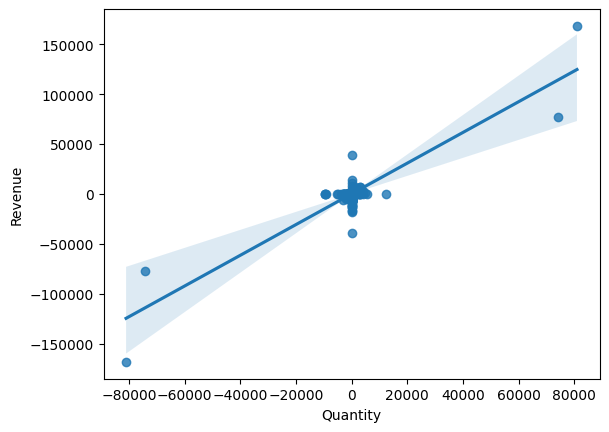

In [53]:
sns.regplot(x='Quantity',y='Revenue',data=df)

<Axes: xlabel='UnitPrice', ylabel='Revenue'>

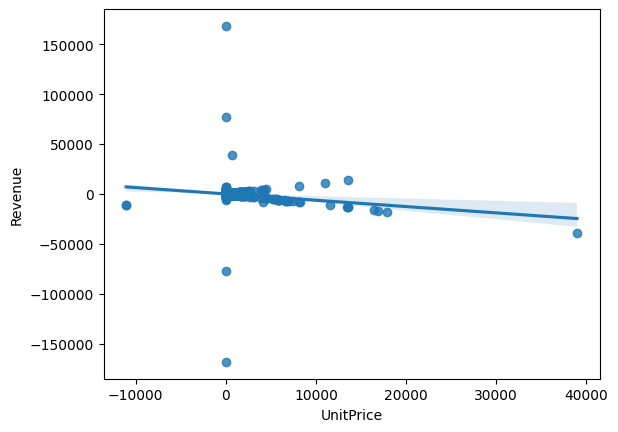

In [54]:
sns.regplot(x='UnitPrice',y='Revenue',data=df)

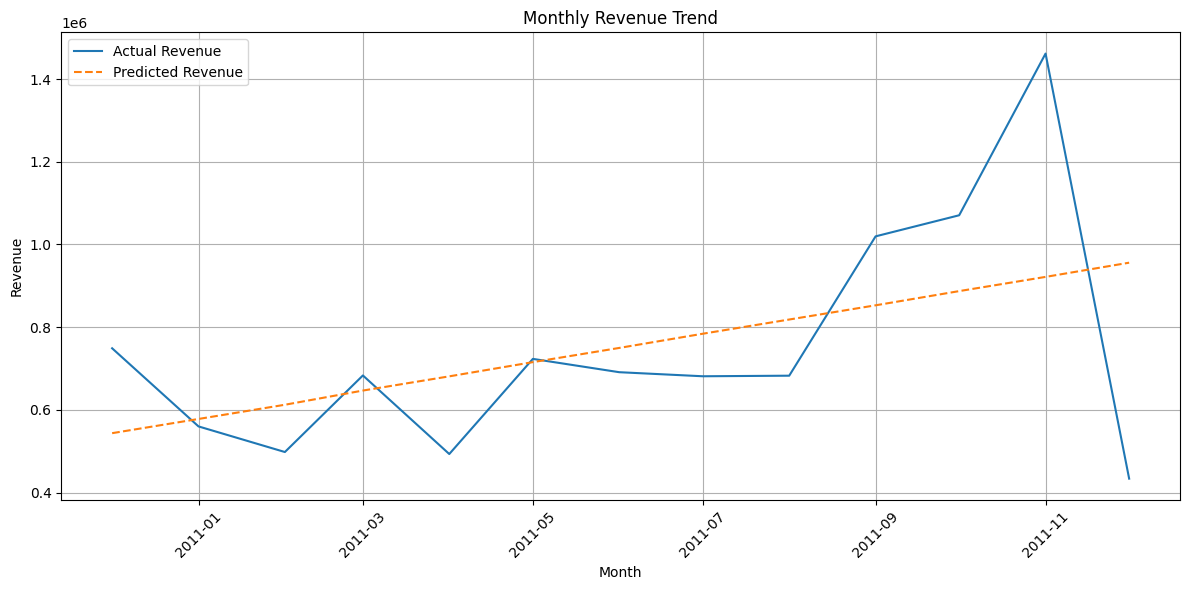

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['InvoiceMonth'], Y2, label='Actual Revenue')
# Use the predictions from the monthly regression model
plt.plot(monthly_revenue['InvoiceMonth'], Yhat_monthly, label='Predicted Revenue', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Trend')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# MSE and R Squared Values

In [56]:
mse_slr = mean_squared_error(df['Revenue'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.786203357454636
The mean square error of price and predicted value is:  30679.257032906135


In [57]:
mse_slr = mean_squared_error(df['Revenue'], Y_hat)
r2_score_slr = lm1.score(X1, Y1)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.026253265029805295
The mean square error of price and predicted value is:  139730.10058268343


In [67]:
mse_slr = mean_squared_error(Y2, Yhat_monthly)
r2_score_slr = lm2.score(X2, Y2)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.2225348716984853
The mean square error of price and predicted value is:  57750340327.10043


# MLR and R^2, MSE Score


In [61]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Ensure 'InvoiceDay' is datetime and create 'InvoiceMonth'
df['InvoiceDay'] = pd.to_datetime(df['InvoiceDay'], errors='coerce')
df['InvoiceMonth'] = df['InvoiceDay'].dt.to_period('M')

# Step 2: Create 'Revenue' if not already done
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Step 3: Create 'MonthIndex'
df['MonthIndex'] = df['InvoiceMonth'].astype(str).rank(method='dense').astype(int) - 1

# Step 4: Prepare X and y
X = df[['Quantity', 'UnitPrice', 'MonthIndex']]
y = df['Revenue']

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 8: Train the MLR model on the training data
lm_mlr = LinearRegression()
lm_mlr.fit(X_train, y_train)

# Step 9: Make predictions on the testing data
y_pred = lm_mlr.predict(X_test)

# Step 10: Evaluate the model
mse_mlr = mean_squared_error(y_test, y_pred)
r2_mlr = r2_score(y_test, y_pred)

print('MLR Results on Test Data:')
print('Mean Squared Error:', mse_mlr)
print('R-squared:', r2_mlr)

MLR Results on Test Data:
Mean Squared Error: 46298.44623623686
R-squared: 0.8008179345957909


<ipython-input-63-cda39af3e148>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-63-cda39af3e148>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="b", label="Predicted Values")


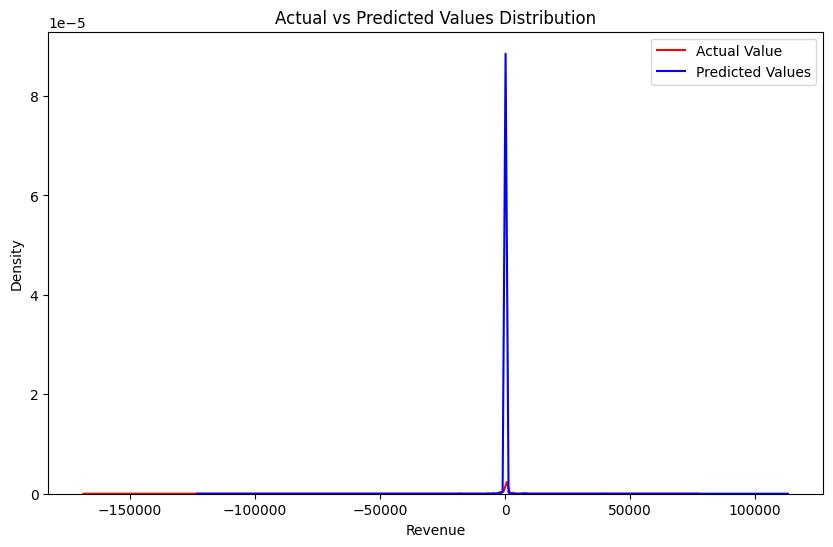

In [63]:
# prompt: make mlr displot for actual and predected in a single plot

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values")
plt.title('Actual vs Predicted Values Distribution')
plt.xlabel('Revenue')
plt.ylabel('Density')
plt.legend()
plt.show()


# Model	R² (Higher is better)	MSE (Lower is better)	Comments

Multiple Linear Regression (MLR): This model has the highest R-squared value (0.8008) and the lowest Mean Squared Error (46298.45).

SLR with Quantity: This model has a decent R-squared (0.7862) and MSE (30679.26),

SLR with MonthIndex: This model has a very low R-squared (0.2225) and a high MSE (30679.26 which seems incorrect given the R squared value is lower than the SLR with Quantity model) indicating it does not explain much of the variance in revenue.

In [68]:
# Make sure to use 'MonthIndex' instead of 'InvoiceMonth'
new_data = pd.DataFrame({
    'Quantity': [863,567,876,452,789.987,321,435,234],
    'UnitPrice': [10,12,12,34,35,23,23,14],
    'MonthIndex': [5,6,7,8,9,10,11,12]   # Same name as in training
})

# Predict
predicted_revenue = lm_mlr.predict(new_data)

print("Predicted Revenue:", predicted_revenue[0])

Predicted Revenue: 1312.761001016956
